# Industrial Production: Electric and gas utilities

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
py.init_notebook_mode(connected=True)  

import cufflinks as cf  
cf.go_offline()


from subprocess import check_output

from sklearn.metrics import mean_squared_error
from math import sqrt

from pandas.plotting import autocorrelation_plot

In [2]:
data = pd.read_csv('Electric_Production.csv',index_col=0)

In [3]:
print(data.head())

          IPG2211A2N
DATE                
1/1/1939      3.3842
2/1/1939      3.4100
3/1/1939      3.4875
4/1/1939      3.5133
5/1/1939      3.5133


In [4]:
data.columns = ['energy']
data.index = pd.to_datetime(data.index)

In [5]:
print(data.shape)
data.head()

(964, 1)


,energy
DATE,
1939-01-01,3.3842
1939-02-01,3.4100
1939-03-01,3.4875
1939-04-01,3.5133
1939-05-01,3.5133


In [6]:
data.tail()

,energy
DATE,
2018-12-01,112.9498
2019-01-01,123.7679
2019-02-01,113.0855
2019-03-01,108.0490
2019-04-01,88.8719


In [7]:
data.index

DatetimeIndex(['1939-01-01', '1939-02-01', '1939-03-01', '1939-04-01',
               '1939-05-01', '1939-06-01', '1939-07-01', '1939-08-01',
               '1939-09-01', '1939-10-01',
               ...
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01', '2019-01-01', '2019-02-01',
               '2019-03-01', '2019-04-01'],
              dtype='datetime64[ns]', name='DATE', length=964, freq=None)

# $EDA$

In [8]:
data.iplot(title="Energy Production Jan 1939--Mar 2019")

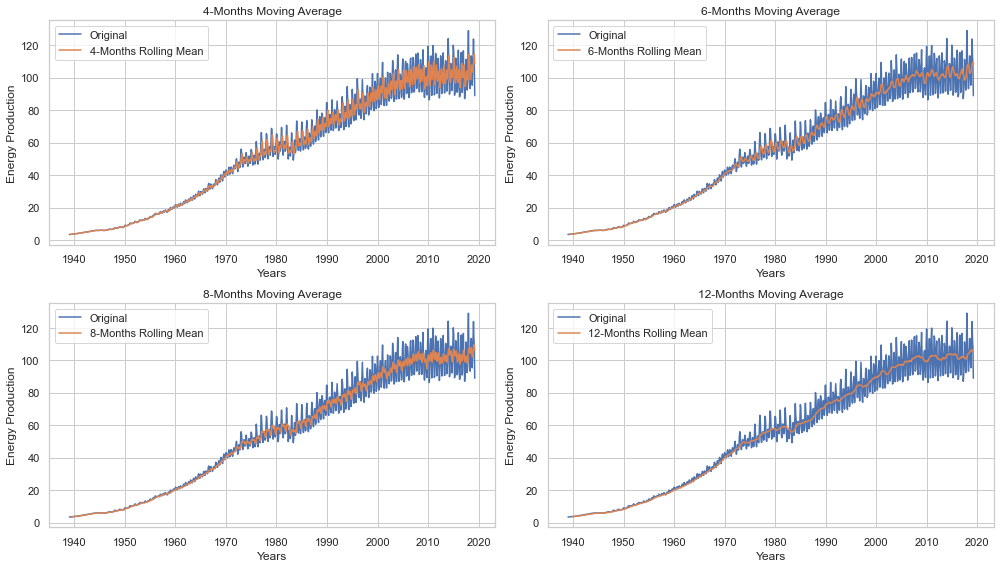

In [9]:
#Creating the subplot placeholders
fig, axes = plt.subplots(2, 2)
fig.set_figwidth(14)
fig.set_figheight(8)

#4 month MA
axes[0][0].plot(data.index, data, label='Original')
axes[0][0].plot(data.index, data.rolling(window=4).mean(), label='4-Months Rolling Mean')
axes[0][0].set_xlabel("Years")
axes[0][0].set_ylabel("Energy Production")
axes[0][0].set_title("4-Months Moving Average")
axes[0][0].legend(loc='best')

#6 month MA
axes[0][1].plot(data.index, data, label='Original')
axes[0][1].plot(data.index, data.rolling(window=6).mean(), label='6-Months Rolling Mean')
axes[0][1].set_xlabel("Years")
axes[0][1].set_ylabel("Energy Production")
axes[0][1].set_title("6-Months Moving Average")
axes[0][1].legend(loc='best')

#8 month MA
axes[1][0].plot(data.index, data, label='Original')
axes[1][0].plot(data.index, data.rolling(window=8).mean(), label='8-Months Rolling Mean')
axes[1][0].set_xlabel("Years")
axes[1][0].set_ylabel("Energy Production")
axes[1][0].set_title("8-Months Moving Average")
axes[1][0].legend(loc='best')

#12 month MA
axes[1][1].plot(data.index, data, label='Original')
axes[1][1].plot(data.index, data.rolling(window=12).mean(), label='12-Months Rolling Mean')
axes[1][1].set_xlabel("Years")
axes[1][1].set_ylabel("Energy Production")
axes[1][1].set_title("12-Months Moving Average")
axes[1][1].legend(loc='best')

plt.tight_layout()
plt.show()


In [10]:
data = data['energy']
data.head()

DATE
1939-01-01    3.3842
1939-02-01    3.4100
1939-03-01    3.4875
1939-04-01    3.5133
1939-05-01    3.5133
Name: energy, dtype: float64

In [11]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = data.rolling(window=12).mean()
    rolstd = data.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:\n')
    dftest = adfuller(timeseries)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

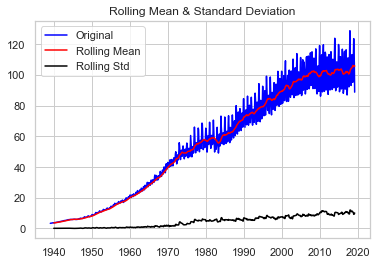

Results of Dickey-Fuller Test:

Test Statistic                  -0.245429
p-value                          0.932886
#Lags Used                      22.000000
Number of Observations Used    941.000000
Critical Value (1%)             -3.437318
Critical Value (5%)             -2.864616
Critical Value (10%)            -2.568408
dtype: float64


In [12]:
test_stationarity(data)

* Though the variation in standard deviation is small, rolling mean is clearly increasing with time and this is not a stationary series. Also, the test statistic is way more than the critical values

In [13]:
data = pd.read_csv('Electric_Production.csv',index_col=0)
data.columns = ['energy']
data.index = pd.to_datetime(data.index)

In [14]:
dates = pd.date_range(start='1939-01-01', freq='MS', periods=len(data))
dates[0:5]

DatetimeIndex(['1939-01-01', '1939-02-01', '1939-03-01', '1939-04-01',
               '1939-05-01'],
              dtype='datetime64[ns]', freq='MS')

In [15]:
import calendar
data['Month'] = dates.month
data['Month'] = data['Month'].apply(lambda x: calendar.month_abbr[x])
data['Year'] = dates.year

In [16]:
pivot_data = pd.pivot_table(data, values = "energy", columns = "Year", index = "Month")
pivot_data = pivot_data.reindex(index = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
pivot_data

Year,1939,1940,1941,1942,1943,1944,1945,1946,1947,1948,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Month,,,,,,,,,,,,,,,,,,,,,
Jan,3.3842,3.7717,4.1850,4.8050,5.2184,5.7350,6.0192,5.9417,6.7425,7.6467,...,119.2473,119.7475,111.8351,115.2323,124.0216,119.9317,116.8926,116.4746,128.9071,123.7679
Feb,3.4100,3.8233,4.2367,4.8567,5.2959,5.8125,6.0192,5.9417,6.6134,7.4659,...,110.7525,107.4965,103.3433,106.4512,112.6796,116.1393,105.9614,99.5393,107.6711,113.0855
Mar,3.4875,3.8492,4.2883,4.8825,5.3217,5.9159,5.9934,5.9417,6.5617,7.4917,...,98.3430,99.1848,93.4051,102.6701,104.4158,104.0218,94.2339,101.0063,104.5716,108.0490
Apr,3.5133,3.8492,4.3400,4.8825,5.3992,5.9417,5.9934,6.0450,6.5617,7.3367,...,86.2612,89.3568,87.4539,90.6136,89.8017,89.1544,88.1615,87.0374,93.4491,88.8719
May,3.5133,3.8750,4.3658,4.8825,5.4250,5.9417,6.0450,6.0967,6.5359,7.1817,...,90.8459,90.0903,92.7704,90.7000,91.8610,90.6950,89.4711,90.3591,93.2405,NaN
Jun,3.5650,3.9267,4.4433,4.9084,5.5284,5.9417,6.1225,6.1225,6.5359,7.2334,...,104.4774,102.9273,101.2446,100.6631,101.6422,102.8863,103.4258,100.4412,103.3083,NaN
Jul,3.5650,3.9267,4.4950,5.0634,5.5800,5.8900,6.0967,6.2517,6.5359,7.2850,...,113.1386,114.9326,113.3866,110.3583,108.6330,111.9826,114.1946,111.2371,113.3178,NaN
Aug,3.6167,3.9783,4.5467,5.0892,5.6059,5.9159,5.9934,6.3550,6.7167,7.4659,...,113.2550,113.7650,110.1671,108.4228,108.3892,110.7643,115.5015,107.7583,113.2758,NaN
Sep,3.7200,4.0300,4.5725,5.1150,5.7092,5.8900,5.8900,6.4325,6.8459,7.5950,...,100.3372,99.5821,96.9014,99.3427,100.4238,101.7996,102.2398,97.0813,101.5656,NaN


## Yearly_Summary

In [17]:
pivot_data.iplot(title="Year wise Trend")

In [18]:
pivot_data.iplot(title="Year wise Trend",kind='box')

## Monthly_Summary

In [19]:
pivot_data.T.iplot(title="Monthly Wise ENergy Production")

In [20]:
pivot_data.T.iplot(title="Monthly Wise Energy Production",kind='box')

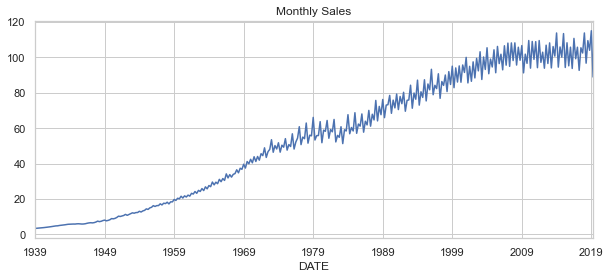

In [21]:
#Quarterly

plt.figure(figsize=(10,4))
plt.title("Monthly Sales")
data.energy.resample('Q').mean().plot()
plt.show()

In [22]:
data = data.drop(['Month','Year'],1)

<ipython-input-23-092db2761503>:3: FutureWarning:

the 'freq'' keyword is deprecated, use 'period' instead



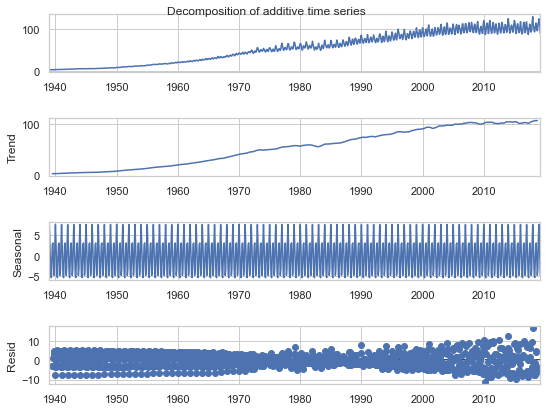

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp_add = seasonal_decompose(data, model ='additive', freq=12) #12 because 12 months

fig = decomp_add.plot()
fig.set_figwidth(8)
fig.set_figheight(6)
fig.suptitle('Decomposition of additive time series')
plt.show()

<ipython-input-24-96b6d21a2283>:1: FutureWarning:

the 'freq'' keyword is deprecated, use 'period' instead



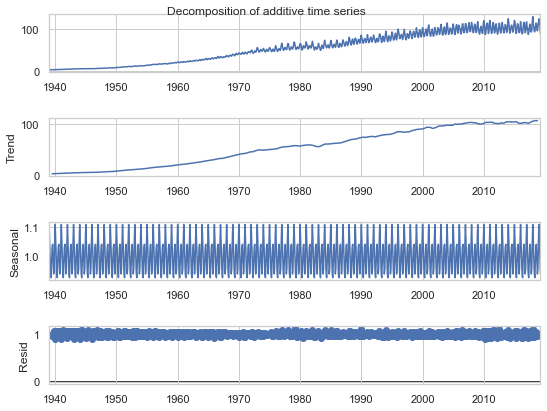

In [24]:
decomp_add = seasonal_decompose(data, model ='multiplicative', freq=12) #12 because 12 months

fig = decomp_add.plot()
fig.set_figwidth(8)
fig.set_figheight(6)
fig.suptitle('Decomposition of additive time series')
plt.show()

In [25]:
data_q = data.energy.resample('Q').mean()

In [26]:
data_q = pd.DataFrame(data_q)
data_q.head()

,energy
DATE,
1939-03-31,3.427233
1939-06-30,3.530533
1939-09-30,3.633900
1939-12-31,3.737200
1940-03-31,3.814733


In [27]:
#Create a string for the quarters
q_str = ('q1','q2','q3','q4')
q_str

('q1', 'q2', 'q3', 'q4')

In [28]:
data_q = data_q.drop(data_q.tail(2).index)

In [29]:
data_q['Quarter'] = q_str*80
data_q.head()
data_q['year'] = data_q.index.year
data_q.head()

,energy,Quarter,year
DATE,,,
1939-03-31,3.427233,q1,1939
1939-06-30,3.530533,q2,1939
1939-09-30,3.633900,q3,1939
1939-12-31,3.737200,q4,1939
1940-03-31,3.814733,q1,1940


In [30]:
quarterly_prod = pd.pivot_table(data_q, values = "energy", columns = "Quarter", index = "year")
quarterly_prod.head()

Quarter,q1,q2,q3,q4
year,,,,
1939,3.427233,3.530533,3.633900,3.737200
1940,3.814733,3.883633,3.978333,4.124733
1941,4.236667,4.383033,4.538067,4.667200
1942,4.848067,4.891133,5.089200,5.192500
1943,5.278667,5.450867,5.631700,5.760867


In [31]:
quarterly_prod.iplot(title='energy production quarterly wise')

In [32]:
quarterly_prod.iplot(kind='box',title='Energy production Quarterly wise')

# Model

## Method 1 : Regression on Time

In [34]:
df1 = data.copy()
df1['Time'] = [i+1 for i in range(len(df1))]

In [35]:
train = df1[0:int(len(df1)*0.7)]
test = df1[int(len(df1)*0.7):]

In [36]:
x_train = train.drop(['energy'],1)
x_test = test.drop(['energy'],1)
y_train = train[['energy']]
y_test = test[['energy']]

In [37]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)
ypred = model.predict(x_test)

In [38]:
y_test['RegonTime'] = ypred

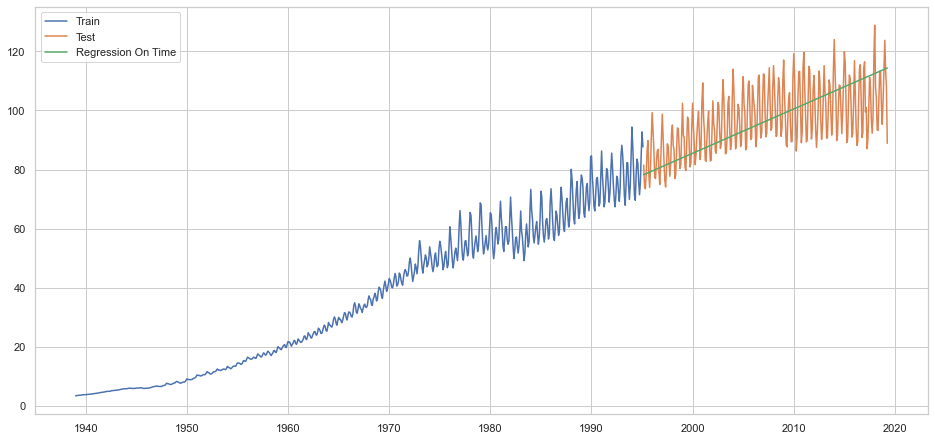

In [39]:
plt.figure(figsize=(16,7.5))
plt.plot(train['energy'],label='Train')
plt.plot(test['energy'], label='Test')
plt.plot(y_test['RegonTime'], label='Regression On Time')
plt.legend(loc='best')

In [40]:
#rmse 
rmse = np.sqrt(mean_squared_error(y_test.energy,y_test.RegonTime))
print("RMSE",rmse)

#mape
mape = np.mean(np.abs((y_test.energy-y_test.RegonTime)/y_test.energy))
print("MAPE",mape)

Result1 = pd.DataFrame({'Method':'Regression- On Time','MAPE':[mape],"RMSE":[rmse]})
Result1

RMSE 9.954931260408795
MAPE 0.08365133717166826


,Method,MAPE,RMSE
0,Regression- On Time,0.083651,9.954931


## Method 2 : Regression with seasonal Components

In [41]:
df2 = df1.copy()

In [42]:
df2['mon_season'] = dates.month

In [43]:
df2.mon_season.unique()


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [44]:
df2['mon_season'] = df2['mon_season'].replace([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],['m1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12'])

In [45]:
df2_new = pd.get_dummies(df2,drop_first=True)
df2_new.head()

,energy,Time,mon_season_m10,mon_season_m11,mon_season_m12,mon_season_m2,mon_season_m3,mon_season_m4,mon_season_m5,mon_season_m6,mon_season_m7,mon_season_m8,mon_season_m9
DATE,,,,,,,,,,,,,
1939-01-01,3.3842,1,0,0,0,0,0,0,0,0,0,0,0
1939-02-01,3.4100,2,0,0,0,1,0,0,0,0,0,0,0
1939-03-01,3.4875,3,0,0,0,0,1,0,0,0,0,0,0
1939-04-01,3.5133,4,0,0,0,0,0,1,0,0,0,0,0
1939-05-01,3.5133,5,0,0,0,0,0,0,1,0,0,0,0


In [46]:
train = df2_new[0:int(len(df2_new)*0.7)]
test = df2_new[int(len(df2_new)*0.7):]

In [47]:
x_train = train.drop(['energy'],1)
x_test = test.drop(['energy'],1)
y_train = train[['energy']]
y_test = test[['energy']]

In [48]:
y_train.shape

(674, 1)

In [49]:
model_new = LinearRegression()
model_new.fit(x_train,y_train)
predictions = model_new.predict(x_test)
y_test['RegonTimeSeasonal'] = predictions

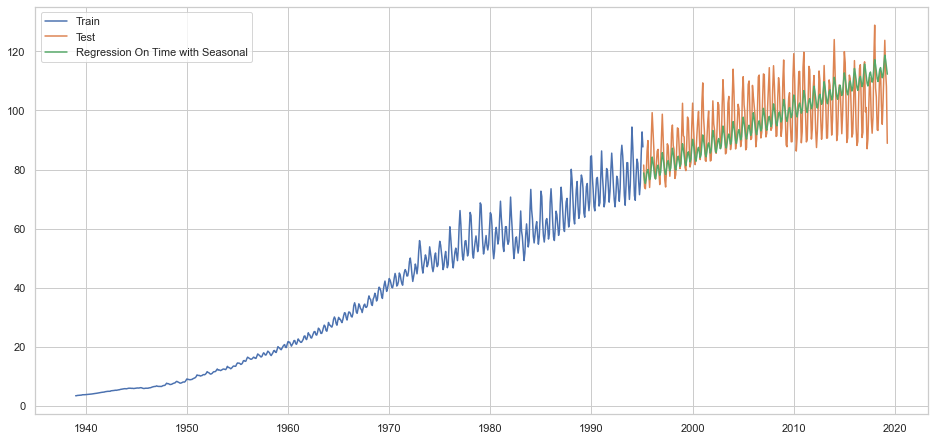

In [50]:
plt.figure(figsize=(16,7.5))
plt.plot( train['energy'], label='Train')
plt.plot(test['energy'], label='Test')
plt.plot(y_test['RegonTimeSeasonal'], label='Regression On Time with Seasonal')
plt.legend(loc='best')

In [51]:
#rmse 
rmse = np.sqrt(mean_squared_error(y_test.energy,y_test.RegonTimeSeasonal))
print("RMSE",rmse)

#mape
mape = np.mean(np.abs((y_test.energy-y_test.RegonTimeSeasonal)/y_test.energy))
print("MAPE",mape)

Result2 = pd.DataFrame({'Method':'Regression- On Time Seasonal','MAPE':[mape],"RMSE":[rmse]})
Result2

RMSE 8.379735491428061
MAPE 0.06860589050900844


,Method,MAPE,RMSE
0,Regression- On Time Seasonal,0.068606,8.379735


## Method 3 : Naive

In [52]:
y_hat = test.copy()

In [53]:
for i in range(len(y_hat)):
    if i == 0:
        y_hat['naive'] = np.nan
    else:
        y_hat['naive'][i] = y_hat.energy[i-1]

In [54]:
y_hat.head(3)

,energy,Time,mon_season_m10,mon_season_m11,mon_season_m12,mon_season_m2,mon_season_m3,mon_season_m4,mon_season_m5,mon_season_m6,mon_season_m7,mon_season_m8,mon_season_m9,naive
DATE,,,,,,,,,,,,,,
1995-03-01,81.5205,675,0,0,0,0,1,0,0,0,0,0,0,NaN
1995-04-01,74.0457,676,0,0,0,0,0,1,0,0,0,0,0,81.5205
1995-05-01,73.5003,677,0,0,0,0,0,0,1,0,0,0,0,74.0457


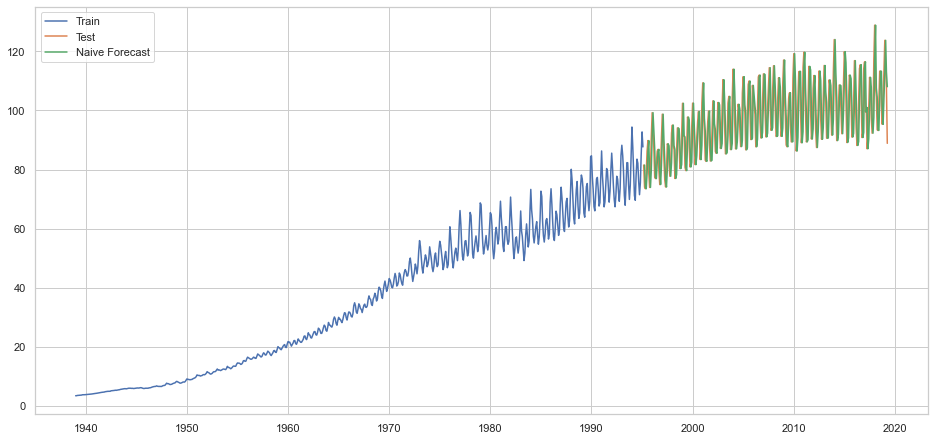

In [55]:
plt.figure(figsize=(16,7.5))
plt.plot(train.index, train['energy'], label='Train')
plt.plot(test.index,test['energy'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')

In [56]:
#rmse 
rmse = np.sqrt(mean_squared_error(y_hat.energy[1:len(y_hat.energy)],y_hat.naive[1:len(y_hat.naive)]))
print("RMSE",rmse)

#mape
mape = np.mean(np.abs((y_hat.energy-y_hat.naive)/y_hat.energy))
print("MAPE",mape)

Result3 = pd.DataFrame({'Method':'Naive','MAPE':[mape],"RMSE":[rmse]})
Result3

RMSE 8.771673186446643
MAPE 0.07668806166498807


,Method,MAPE,RMSE
0,Naive,0.076688,8.771673


## Method 4 :Simple average

In [57]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['energy'].mean()

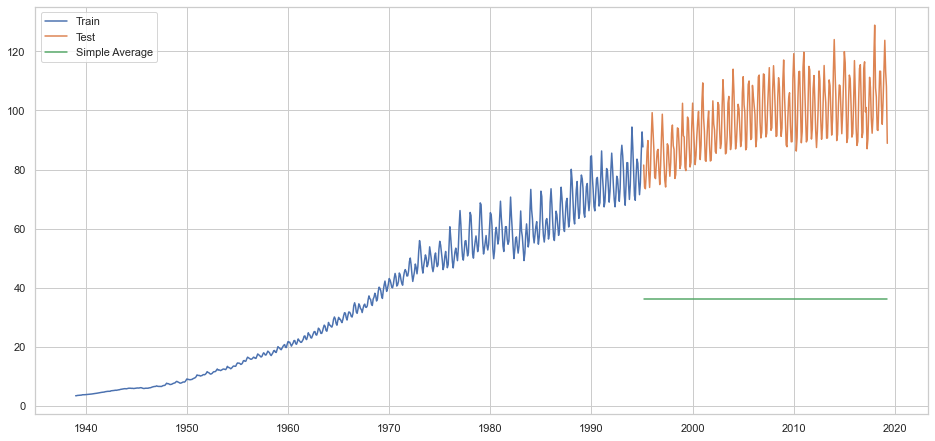

In [58]:
plt.figure(figsize=(16,7.5))
plt.plot(train.index, train['energy'], label='Train')
plt.plot(test.index,test['energy'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple Average')
plt.legend(loc='best')

In [59]:
#rmse 
rmse = np.sqrt(mean_squared_error(y_hat_avg.energy,y_hat_avg.avg_forecast))
print("RMSE",rmse)

#mape
mape = np.mean(np.abs((y_hat_avg.energy-y_hat_avg.avg_forecast)/y_hat.energy))
print("MAPE",mape)

Result4 = pd.DataFrame({'Method':'Simple average','MAPE':[mape],"RMSE":[rmse]})
Result4

RMSE 61.98133485157737
MAPE 0.6236904201956879


,Method,MAPE,RMSE
0,Simple average,0.62369,61.981335


## Method 5 :Moving Average

In [60]:
df1 = data.copy()

In [61]:
df1['Moving_avg_forecast'] = df1['energy'].rolling(3).mean()

In [62]:
train = df1[0:int(len(df1)*0.7)]
test = df1[int(len(df1)*0.7):]

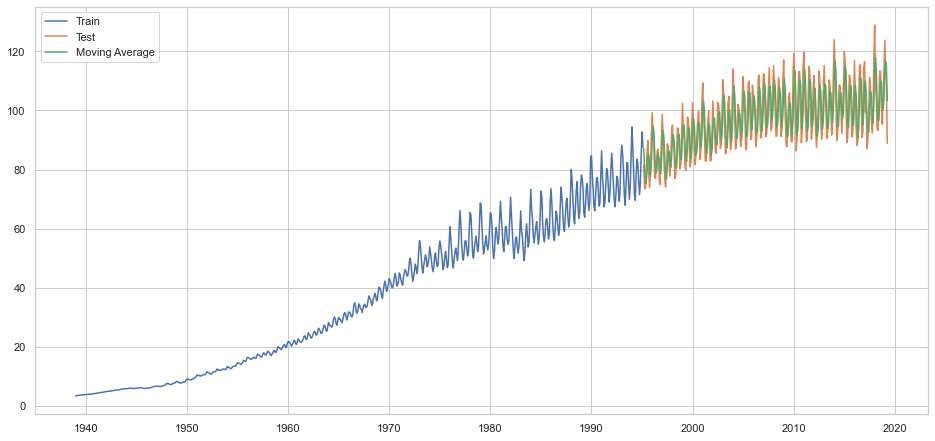

In [63]:
plt.figure(figsize=(16,7.5))
plt.plot(train.index, train['energy'], label='Train')
plt.plot(test.index,test['energy'], label='Test')
plt.plot(test['Moving_avg_forecast'], label='Moving Average')
plt.legend(loc='best')

In [64]:
#rmse 
rmse = np.sqrt(mean_squared_error(test.energy, test.Moving_avg_forecast))
print("RMSE",rmse)

#mape
mape = np.mean(np.abs((test.energy-test.Moving_avg_forecast)/test.energy))
print("MAPE",mape)

Result5 = pd.DataFrame({'Method':'Moving Average','MAPE':[mape],"RMSE":[rmse]})
Result5

RMSE 7.370938293267492
MAPE 0.06657956233702861


,Method,MAPE,RMSE
0,Moving Average,0.06658,7.370938


## Method 6: Exponential Smoothing

In [65]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [66]:
alpha=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
for i in alpha:
    model = SimpleExpSmoothing(train['energy'])
    model_fit = model.fit(smoothing_level=i,optimized=False)
    ap_ES = test.copy()
    ap_ES['SES'] = model_fit.forecast(len(test['energy']))
    rmse = np.sqrt(mean_squared_error(test.energy, ap_ES.SES))
    rmse = round(rmse, 3)
    abs_error = np.abs(y_test['energy']-ap_ES.SES)
    actual = y_test['energy']
    mape = np.round(np.mean(abs_error/actual),4)
    print("**********************************")
    print("Alpha Value: ",i)
    print("The RMSE Value: ",rmse)
    print("The MAPE Value :",mape)

C:\Users\vharsheny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\vharsheny\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning:

After 0.13 initialization must be handled at model creation

C:\Users\vharsheny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\vharsheny\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning:

After 0.13 initialization must be handled at model creation

C:\Users\vharsheny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\vharsheny\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning:

After 0.13 initializati

**********************************
Alpha Value:  0.1
The RMSE Value:  19.853
The MAPE Value : 0.1649
**********************************
Alpha Value:  0.2
The RMSE Value:  18.11
The MAPE Value : 0.1469
**********************************
Alpha Value:  0.3
The RMSE Value:  16.744
The MAPE Value : 0.1335
**********************************
Alpha Value:  0.4
The RMSE Value:  15.651
The MAPE Value : 0.1225
**********************************
Alpha Value:  0.5
The RMSE Value:  14.859
The MAPE Value : 0.1147


C:\Users\vharsheny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\vharsheny\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning:

After 0.13 initialization must be handled at model creation

C:\Users\vharsheny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\vharsheny\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning:

After 0.13 initialization must be handled at model creation

C:\Users\vharsheny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\vharsheny\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning:

After 0.13 initializati

**********************************
Alpha Value:  0.6
The RMSE Value:  14.354
The MAPE Value : 0.1101
**********************************
Alpha Value:  0.7
The RMSE Value:  14.099
The MAPE Value : 0.1079
**********************************
Alpha Value:  0.8
The RMSE Value:  14.055
The MAPE Value : 0.1076
**********************************
Alpha Value:  0.9
The RMSE Value:  14.184
The MAPE Value : 0.1086
**********************************
Alpha Value:  1.0
The RMSE Value:  14.454
The MAPE Value : 0.111


C:\Users\vharsheny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\vharsheny\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning:

After 0.13 initialization must be handled at model creation

C:\Users\vharsheny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\vharsheny\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning:

After 0.13 initialization must be handled at model creation



In [67]:
model_fit = model.fit(smoothing_level=0.8,optimized=False)
model_fit.params

{'smoothing_level': 0.8,
 'smoothing_trend': None,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 3.3842,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [68]:
y_hat_avg = test.copy()
y_hat_avg['SES'] = model_fit.forecast(len(test['energy']))

In [69]:
y_hat_avg.head()

,energy,Moving_avg_forecast,SES
DATE,,,
1995-03-01,81.5205,87.309567,88.293891
1995-04-01,74.0457,81.077733,88.293891
1995-05-01,73.5003,76.355500,88.293891
1995-06-01,78.5503,75.365433,88.293891
1995-07-01,86.2425,79.431033,88.293891


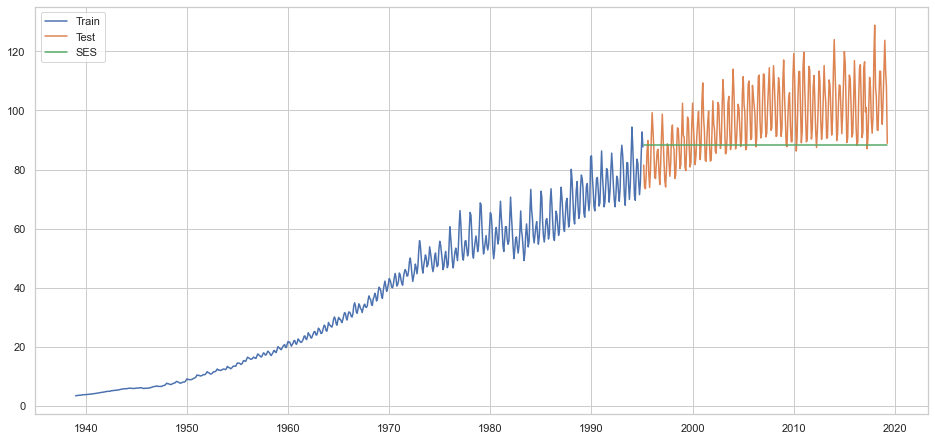

In [70]:
plt.figure(figsize=(16,7.5))
plt.plot(train['energy'], label='Train')
plt.plot(test['energy'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')

In [71]:
#rmse 
rmse = np.sqrt(mean_squared_error(y_test.energy,y_hat_avg.SES))
print("RMSE",rmse)

#mape
mape = np.mean(np.abs((y_test.energy-y_hat_avg.SES)/y_test.energy))
print("MAPE",mape)

Result6 = pd.DataFrame({'Method':'Exponential Smoothing','MAPE':[mape],"RMSE":[rmse]})
Result6

RMSE 14.055088900245735
MAPE 0.10755625337245833


,Method,MAPE,RMSE
0,Exponential Smoothing,0.107556,14.055089


## Method 7 : Holt Method

In [72]:
fit1 = ExponentialSmoothing(np.asarray(train['energy']), seasonal_periods=12, trend='add').fit() #12 for monthly
fit1.params

C:\Users\vharsheny\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning:

After 0.13 initialization must be handled at model creation



{'smoothing_level': 0.9999999850988388,
 'smoothing_trend': 0.0,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 3.2589506572658844,
 'initial_trend': 0.12522181498794252,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [73]:
y_hat_avg['Holt'] = fit1.forecast(len(test))

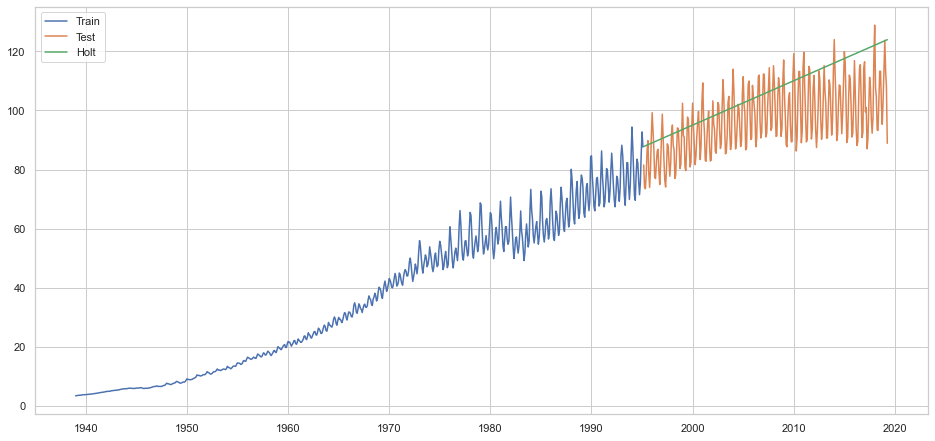

In [75]:
plt.figure(figsize=(16,7.5))
plt.plot( train['energy'], label='Train')
plt.plot(test['energy'], label='Test')
plt.plot(y_hat_avg['Holt'], label='Holt')
plt.legend(loc='best')

In [76]:
#rmse 
rmse = np.sqrt(mean_squared_error(y_test.energy,y_hat_avg['Holt']))
print("RMSE",rmse)

#mape
mape = np.mean(np.abs((y_test.energy-y_hat_avg['Holt'])/y_test.energy))
print("MAPE",mape)

Result7 = pd.DataFrame({'Method':'Holt','MAPE':[mape],"RMSE":[rmse]})
Result7

RMSE 13.292615971343958
MAPE 0.11521310411407962


,Method,MAPE,RMSE
0,Holt,0.115213,13.292616


## 8. Holt Winter - Additive

In [77]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['energy']), seasonal_periods=12, trend='add', seasonal='add').fit() #12 for monthly
fit1.params

C:\Users\vharsheny\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning:

After 0.13 initialization must be handled at model creation



{'smoothing_level': 0.31691416334112704,
 'smoothing_trend': 1.1034212935453741e-14,
 'smoothing_seasonal': 0.4524423568387757,
 'damping_trend': nan,
 'initial_level': 40.35077964201174,
 'initial_trend': 0.11390115185403751,
 'initial_seasons': array([-37.13590928, -37.13983062, -37.12095076, -37.13281517,
        -37.15896592, -37.14491636, -37.17950186, -37.18881047,
        -37.16548163, -37.1991543 , -37.18877105, -37.21992885]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [78]:
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))

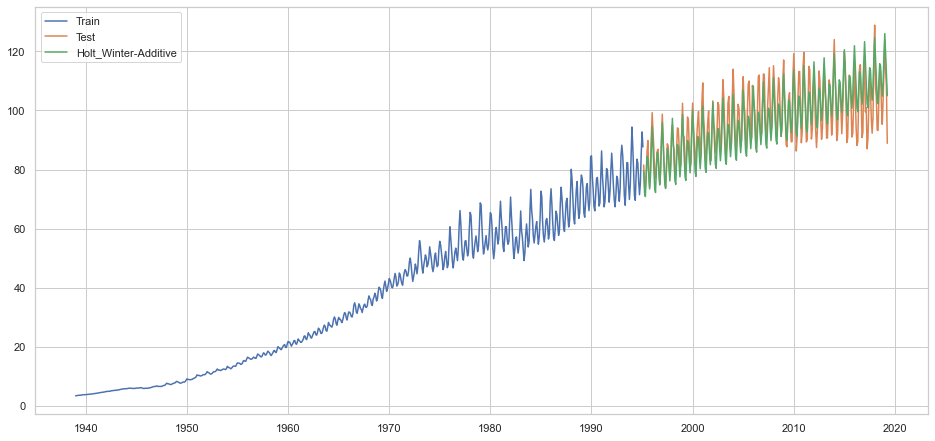

In [79]:
plt.figure(figsize=(16,7.5))
plt.plot( train['energy'], label='Train')
plt.plot(test['energy'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter-Additive')
plt.legend(loc='best')

In [80]:
#rmse 
rmse = np.sqrt(mean_squared_error(y_test.energy,y_hat_avg['Holt_Winter']))
print("RMSE",rmse)

#mape
mape = np.mean(np.abs((y_test.energy-y_hat_avg['Holt_Winter'])/y_test.energy))
print("MAPE",mape)

Result8 = pd.DataFrame({'Method':'Holt Winter - Additive','MAPE':[mape],"RMSE":[rmse]})
Result8

RMSE 5.6542447717307915
MAPE 0.04653745323889746


,Method,MAPE,RMSE
0,Holt Winter - Additive,0.046537,5.654245


## Method 9 : Holt Winter - Multiplicative

In [81]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['energy']), seasonal_periods=12, trend='add', seasonal='mul').fit() #12 for monthly
fit1.params

C:\Users\vharsheny\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning:

After 0.13 initialization must be handled at model creation



{'smoothing_level': 0.3014036579978215,
 'smoothing_trend': 0.0038642142028018764,
 'smoothing_seasonal': 0.4064222496659311,
 'damping_trend': nan,
 'initial_level': 40.46125890910752,
 'initial_trend': 1.1771737292999194,
 'initial_seasons': array([0.07983637, 0.07986955, 0.08025775, 0.08028464, 0.08009582,
        0.08058928, 0.08036567, 0.08031534, 0.08061043, 0.08001188,
        0.08014017, 0.07957401]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [82]:
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))

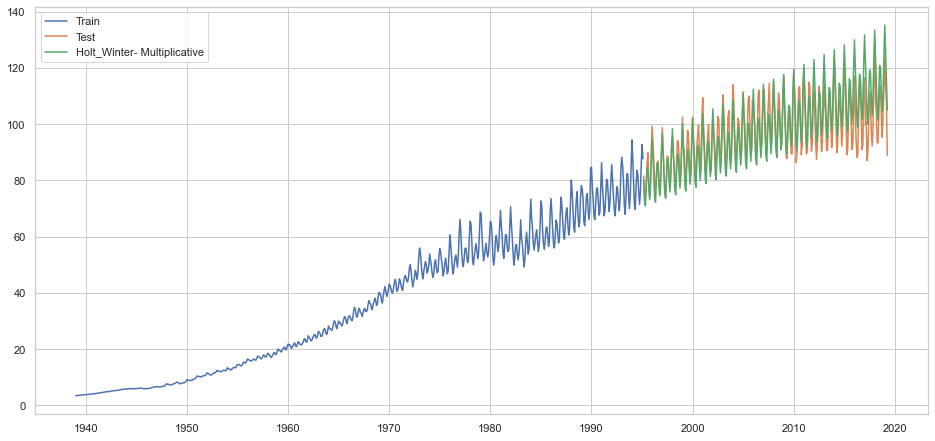

In [83]:
plt.figure(figsize=(16,7.5))
plt.plot( train['energy'], label='Train')
plt.plot(test['energy'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter- Multiplicative')
plt.legend(loc='best')

In [84]:
#rmse 
rmse = np.sqrt(mean_squared_error(y_test.energy,y_hat_avg['Holt_Winter']))
print("RMSE",rmse)

#mape
mape = np.mean(np.abs((y_test.energy-y_hat_avg['Holt_Winter'])/y_test.energy))
print("MAPE",mape)

Result9 = pd.DataFrame({'Method':'Holt Winter - multiplicative','MAPE':[mape],"RMSE":[rmse]})
Result9

RMSE 6.079561437085143
MAPE 0.04853585712653588


,Method,MAPE,RMSE
0,Holt Winter - multiplicative,0.048536,6.079561


In [85]:
final = pd.concat([Result1,Result2,Result3,Result4,Result5,Result6,Result7,Result8,Result9])
final.index = [i for i in range(len(final))]
final.sort_values(by='RMSE')

,Method,MAPE,RMSE
7,Holt Winter - Additive,0.046537,5.654245
8,Holt Winter - multiplicative,0.048536,6.079561
4,Moving Average,0.066580,7.370938
1,Regression- On Time Seasonal,0.068606,8.379735
2,Naive,0.076688,8.771673
0,Regression- On Time,0.083651,9.954931
6,Holt,0.115213,13.292616
5,Exponential Smoothing,0.107556,14.055089
3,Simple average,0.623690,61.981335


* Here the data has Level, trend and Seasonality the best method for this is Holt winter Multiplicative it gives less error while comapring with other forecasting techniques

## Build Statinary Series

In [86]:
data.head()

,energy
DATE,
1939-01-01,3.3842
1939-02-01,3.4100
1939-03-01,3.4875
1939-04-01,3.5133
1939-05-01,3.5133


Text(0, 0.5, 'Energy')

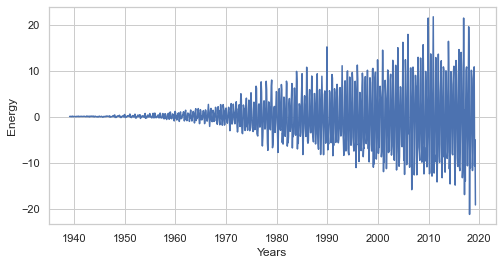

In [87]:
#Differencing once to remove trend

plt.figure(figsize=(8, 4))
plt.plot(data.diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Energy')

* Although the trend is removed after differencing, there is unequal variance which implies that the series is not stationary
* We will apply differencing to the log of the series to see if it helps remove the unequal variance

Text(0, 0.5, 'Log (energy Production)')

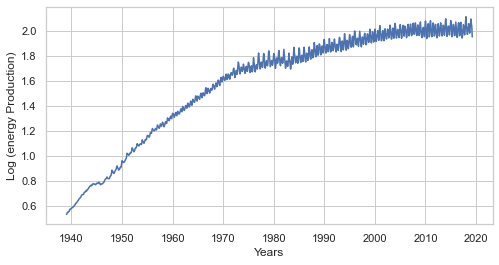

In [88]:
#Log of time series

plt.figure(figsize=(8, 4))
plt.plot(np.log10(data))
plt.xlabel('Years')
plt.ylabel('Log (energy Production)')

Text(0, 0.5, 'Differenced Log (Energy production)')

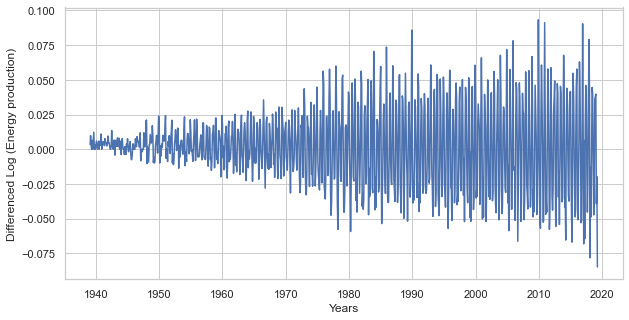

In [89]:
#Difference of log

plt.figure(figsize=(10, 5))
plt.plot(np.log10(data).diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Differenced Log (Energy production)')

Now this series Log+diff now has a constant mean as well as constant variance

In [90]:
#Log of the time series
energy_log = np.log10(data)
energy_log.dropna(inplace=True)

#Diff of the log
energy_log_diff = energy_log.diff(periods=1) # same as energy_log_diff = energy_log - energy_log.shift(periods=1)
energy_log_diff.dropna(inplace=True)

In [91]:
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

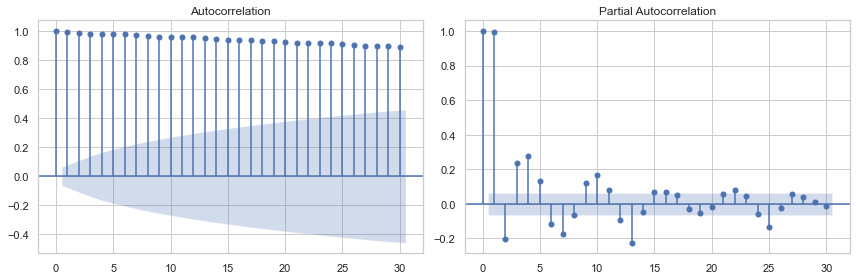

In [92]:
##ACF and PACF plots of the log series

fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(energy_log, ax=axes[0])
smt.graphics.plot_pacf(energy_log, ax=axes[1])
plt.tight_layout()

In [93]:
# Create a diff of 12 on the log series
#Diff of the log
energy_log_diff12 = energy_log.diff(periods=12) 
energy_log_diff12.dropna(inplace=True)

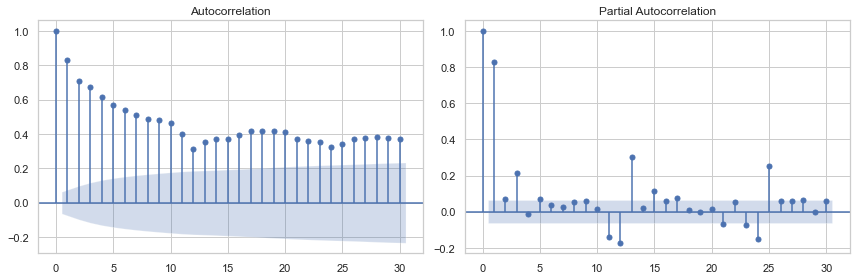

In [94]:
#ACF and PACF plots of diff of log series
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(energy_log_diff12,  ax=axes[0])
smt.graphics.plot_pacf(energy_log_diff12,  ax=axes[1])
plt.tight_layout()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

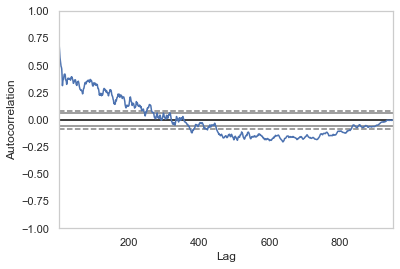

In [95]:
autocorrelation_plot(energy_log_diff12)

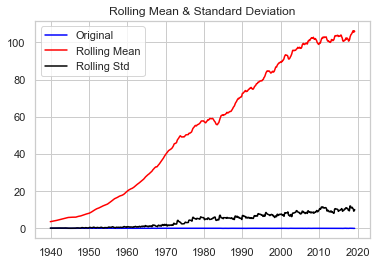

Results of Dickey-Fuller Test:

Test Statistic                  -3.466746
p-value                          0.008883
#Lags Used                      22.000000
Number of Observations Used    929.000000
Critical Value (1%)             -3.437409
Critical Value (5%)             -2.864656
Critical Value (10%)            -2.568429
dtype: float64


In [96]:
test_stationarity(energy_log_diff12.energy)

* here p value is 0.008 which is less than significant value 0..05 so Reject Null hypothesis 
* the data of energy_log_diff12 is Stationary

# Auto regressive model - Simple AR Model

In [97]:
# split the data
X = energy_log_diff12.values
X.size # 3 years of data

952

In [98]:
train = X[0:int(len(X)*0.7)]
test = X[int(len(X)*0.7):]

In [99]:
print(train.shape)
print(test.shape)

(666, 1)
(286, 1)


In [100]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

In [101]:
#trained the model
model_ar = AR(train)
model_ar_fit = model_ar.fit()

C:\Users\vharsheny\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning:


statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)




In [102]:
#predict the model
predictions = model_ar_fit.predict(start=666, end=952)
print(predictions.shape)

(287,)


In [103]:
test = np.exp(test)
predictions = np.exp(predictions)

In [104]:
predictions[1:].shape

(286,)

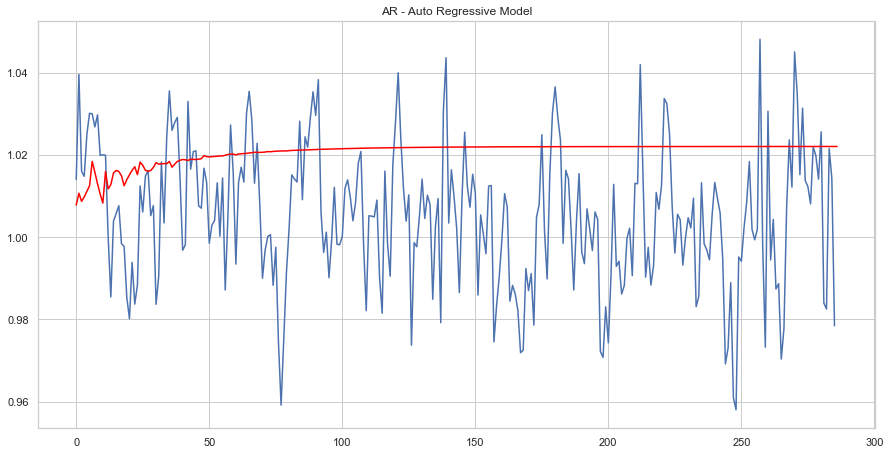

In [105]:

plt.figure(figsize=(15,7.5))
plt.title("AR - Auto Regressive Model")
plt.plot(test)
plt.plot(predictions,color = 'red')

In [106]:
#rmse 
rmse = np.sqrt(mean_squared_error(test,predictions[1:]))
print("RMSE",rmse)

#mape
mape = np.mean(np.abs((test-predictions[1:])/test))
print("MAPE",mape)

Result_ar = pd.DataFrame({'Method':'Simple AR model','MAPE':[mape],"RMSE":[rmse]})
Result_ar

RMSE 0.0233099936304588
MAPE 0.018941231700450478


,Method,MAPE,RMSE
0,Simple AR model,0.018941,0.02331


# ARIMA

In [107]:
from statsmodels.tsa.arima_model import ARIMA
train = X[0:int(len(X)*0.7)]
test = X[int(len(X)*0.7):]

In [108]:
model_arima = ARIMA(train,order = (3,1,0)) # p -3 , d = 1, q =1
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

C:\Users\vharsheny\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




-4326.759272127975


In [109]:
p=d=q=range(0,5)

import itertools
## create a list with all possible combination
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [110]:
import warnings 
warnings.filterwarnings('ignore')

for param in pdq:
    try:
        model_arima = ARIMA(train,order = param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    
    except:
        continue

(0, 0, 0) -3369.0468152792337
(0, 0, 1) -3900.904422405839
(0, 0, 2) -4094.9030009983753
(0, 0, 3) -4202.222128474696
(0, 0, 4) -4226.502640220745
(0, 1, 0) -4293.600017565672
(0, 1, 1) -4293.2346418149045
(0, 1, 2) -4325.17133099461
(0, 1, 3) -4332.228147306311
(0, 1, 4) -4333.380585375366
(0, 2, 0) -3803.4628337390977
(0, 2, 1) -4275.856712761684
(0, 2, 2) -4275.040340583748
(0, 2, 3) -4308.291866421922
(0, 2, 4) -4309.452604659189
(1, 0, 0) -4338.68743305509
(1, 0, 1) -4337.259932542035
(1, 0, 2) -4349.909137352754
(1, 0, 3) -4352.252739158244
(1, 0, 4) -4350.795967222263
(1, 1, 0) -4292.5821085784755
(1, 1, 1) -4351.378709052908
(1, 1, 2) -4352.599402419766
(1, 1, 3) -4357.043054645942
(1, 1, 4) -4358.3428626450295
(1, 2, 0) -3933.7512375631404
(1, 2, 1) -4267.8133443052175
(1, 2, 4) -4299.435793688331
(2, 0, 0) -4337.0829019979565
(2, 0, 1) -4364.264404514236
(2, 0, 2) -4351.69109104168
(2, 0, 3) -4350.447007618384
(2, 0, 4) -4377.043766343978
(2, 1, 0) -4315.449784742758
(2, 1, 1

In [111]:
model_arima = ARIMA(train,order = (4,1,4)) 
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

-4421.405975843551


In [112]:
predictions = model_arima_fit.predict(start=666, end=952)
print(predictions.shape)

(287,)


In [113]:
test = np.exp(test)
predictions = np.exp(predictions)

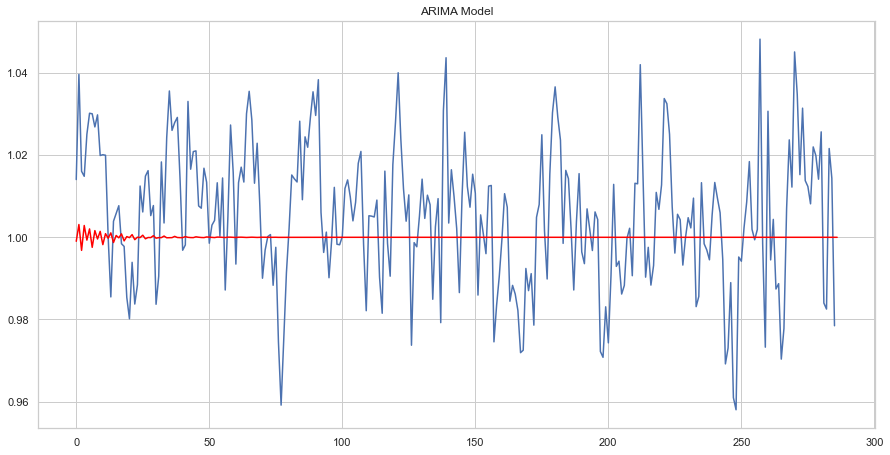

In [114]:
plt.figure(figsize=(15,7.5))
plt.title("ARIMA Model")
plt.plot(test)
plt.plot(predictions,color = 'red')

In [115]:
#rmse 
rmse = np.sqrt(mean_squared_error(test,predictions[1:]))
print("RMSE",rmse)

#mape
mape = np.mean(np.abs((test-predictions[1:])/test))
print("MAPE",mape)

Result_arima = pd.DataFrame({'Method':'ARIMA model','MAPE':[mape],"RMSE":[rmse]})
Result_arima

RMSE 0.017568637115158728
MAPE 0.013969009821569036


,Method,MAPE,RMSE
0,ARIMA model,0.013969,0.017569


# SARIMA

In [116]:
from pmdarima.arima import auto_arima

##  p,d,q values for the ARIMA, and P,D,Q values for the Seasonal component.

stepwise_model = auto_arima(X, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=2.73 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-4708.195, Time=0.57 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-5116.950, Time=0.49 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=3.11 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-4727.532, Time=0.49 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=-5363.458, Time=5.30 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=7.64 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=2.73 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=-5351.261, Time=3.71 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=-5424.179, Time=5.81 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=-5178.900, Time=1.88 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=13.10 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=3.56 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=-5423.545, Time=3.48 sec
 ARIMA(2,1,1)(2,1,0)[12]             : A

In [117]:
stepwise_model.aic()

-5481.656924576822

In [118]:
train = X[0:int(len(X)*0.7)]
test = X[int(len(X)*0.7):]

In [119]:
#train the model
stepwise_model.fit(train)

ARIMA(order=(3, 1, 3), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [120]:
test.shape

(286, 1)

In [121]:
predictions = stepwise_model.predict(n_periods=286)
print(predictions.shape)

(286,)


In [122]:
test = np.exp(test)
predictions = np.exp(predictions)

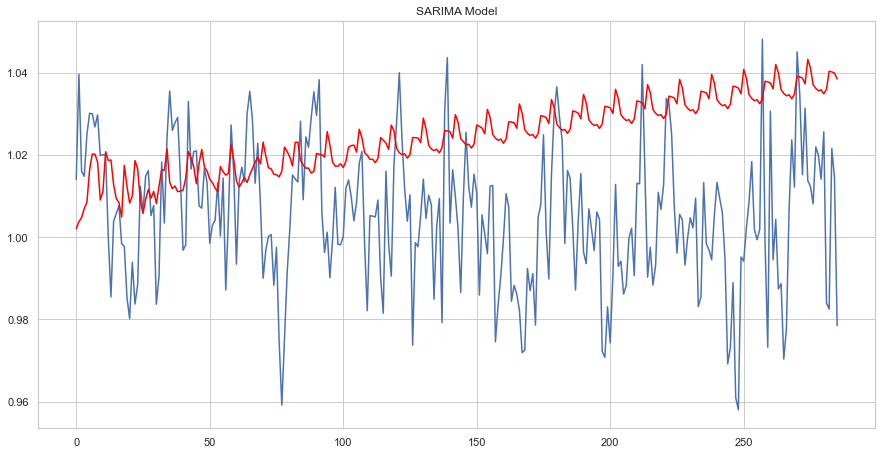

In [123]:
plt.figure(figsize=(15,7.5))
plt.title("SARIMA Model")
plt.plot(test)
plt.plot(predictions,color = 'red')

In [124]:
#rmse 
rmse = np.sqrt(mean_squared_error(test,predictions))
print("RMSE",rmse)

#mape
mape = np.mean(np.abs((test-predictions)/test))
print("MAPE",mape)

Result_sarima = pd.DataFrame({'Method':'SARIMA model','MAPE':[mape],"RMSE":[rmse]})
Result_sarima

RMSE 0.027869338853332787
MAPE 0.022365174218908938


,Method,MAPE,RMSE
0,SARIMA model,0.022365,0.027869


In [125]:
final_result = pd.concat([Result1,Result2,Result3,Result4,Result5,Result6,Result7,Result8,Result9,Result_ar,Result_arima,Result_sarima])
final_result.index = [i for i in range(len(final_result))]
final_result.sort_values(by='RMSE')

,Method,MAPE,RMSE
10,ARIMA model,0.013969,0.017569
9,Simple AR model,0.018941,0.023310
11,SARIMA model,0.022365,0.027869
7,Holt Winter - Additive,0.046537,5.654245
8,Holt Winter - multiplicative,0.048536,6.079561
4,Moving Average,0.066580,7.370938
1,Regression- On Time Seasonal,0.068606,8.379735
2,Naive,0.076688,8.771673
0,Regression- On Time,0.083651,9.954931
6,Holt,0.115213,13.292616


* from this best is SARIMA because after certain time it becomes constant and it doesn't work well with seasonality so take SARIMA to forecast for future values 

## Final Predicted Model with SARIMA

In [126]:
stepwise_model_fn = auto_arima(data, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model_fn.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=3802.761, Time=0.90 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4314.866, Time=0.11 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4149.142, Time=0.37 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=3927.018, Time=0.43 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=inf, Time=0.40 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=3801.901, Time=0.93 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=3980.578, Time=0.87 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=3773.392, Time=2.45 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=3856.032, Time=1.79 sec
 ARIMA(1,1,1)(2,1,2)[12]             : AIC=3753.135, Time=5.29 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=3795.180, Time=3.67 sec
 ARIMA(0,1,1)(2,1,2)[12]             : AIC=3853.807, Time=5.01 sec
 ARIMA(1,1,0)(2,1,2)[12]             : AIC=3898.543, Time=4.60 sec
 ARIMA(2,1,1)(2,1,2)[12]             : AIC=3752.749, Time=6.73 sec
 ARIMA(2,1,1)(1,1,2)[12]

In [127]:
stepwise_model_fn.aic()

3748.443166430995

In [128]:
stepwise_model.fit(data)

ARIMA(order=(3, 1, 3), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [129]:
predictions = stepwise_model.predict(n_periods=20)
print(predictions.shape)
predictions

(20,)


array([ 91.57304914, 105.36253335, 114.0315839 , 114.04877093,
       103.99533326,  95.14697479,  99.33310776, 115.57197878,
       123.70220679, 108.24793692, 106.38727514,  90.96180281,
        92.49466031, 104.19405181, 115.11166828, 113.41432002,
       101.99236087,  95.80043669, 101.13980901, 117.0736241 ])

In [130]:
data.tail(4)

,energy
DATE,
2019-01-01,123.7679
2019-02-01,113.0855
2019-03-01,108.0490
2019-04-01,88.8719


In [131]:
future_dates = pd.date_range(start='2019-05-01', freq='MS', periods=len(predictions))
future_dates


DatetimeIndex(['2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [132]:
future_forecast = pd.DataFrame(predictions,index=future_dates)
future_forecast.columns=['prediction']
future_forecast

,prediction
2019-05-01,91.573049
2019-06-01,105.362533
2019-07-01,114.031584
2019-08-01,114.048771
2019-09-01,103.995333
2019-10-01,95.146975
2019-11-01,99.333108
2019-12-01,115.571979
2020-01-01,123.702207
2020-02-01,108.247937


In [133]:
data_for_19to20 = pd.DataFrame(predictions,index=future_dates)
data_for_19to20

,0
2019-05-01,91.573049
2019-06-01,105.362533
2019-07-01,114.031584
2019-08-01,114.048771
2019-09-01,103.995333
2019-10-01,95.146975
2019-11-01,99.333108
2019-12-01,115.571979
2020-01-01,123.702207
2020-02-01,108.247937


In [134]:
data_for_19to20.columns=['energy']
data_for_19to20

,energy
2019-05-01,91.573049
2019-06-01,105.362533
2019-07-01,114.031584
2019-08-01,114.048771
2019-09-01,103.995333
2019-10-01,95.146975
2019-11-01,99.333108
2019-12-01,115.571979
2020-01-01,123.702207
2020-02-01,108.247937


In [135]:
data_for_19to20 = pd.concat([data.tail(4),data_for_19to20])
data_for_19to20

,energy
2019-01-01,123.767900
2019-02-01,113.085500
2019-03-01,108.049000
2019-04-01,88.871900
2019-05-01,91.573049
2019-06-01,105.362533
2019-07-01,114.031584
2019-08-01,114.048771
2019-09-01,103.995333
2019-10-01,95.146975


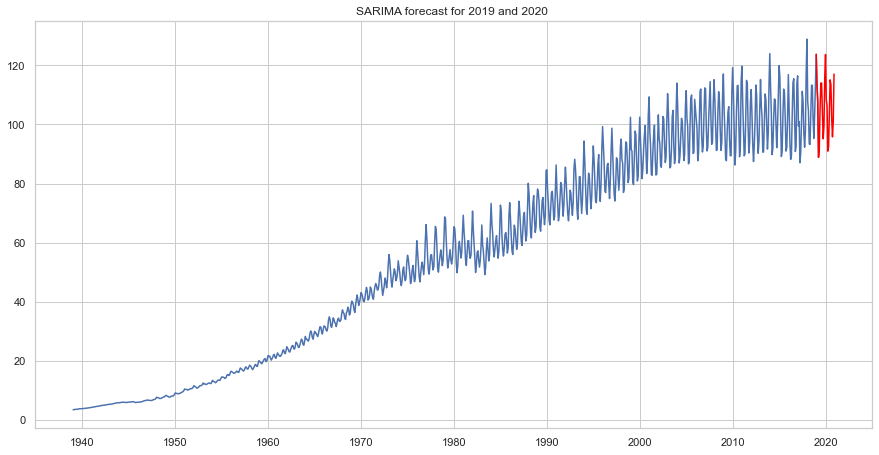

In [136]:
plt.figure(figsize=(15,7.5))
plt.title("SARIMA forecast for 2019 and 2020 ")
plt.plot(data)
plt.plot(data_for_19to20,color = 'red')

In [137]:
pd.concat([data,future_forecast]).iplot()

In [138]:
data_for_19to20.iplot()

In [139]:
data_for_19to20['month'] = data_for_19to20.index.month
data_for_19to20['month'] = data_for_19to20['month'].apply(lambda x: calendar.month_abbr[x])
data_for_19to20['year'] = data_for_19to20.index.year

In [140]:
data_for_19to20

,energy,month,year
2019-01-01,123.767900,Jan,2019
2019-02-01,113.085500,Feb,2019
2019-03-01,108.049000,Mar,2019
2019-04-01,88.871900,Apr,2019
2019-05-01,91.573049,May,2019
2019-06-01,105.362533,Jun,2019
2019-07-01,114.031584,Jul,2019
2019-08-01,114.048771,Aug,2019
2019-09-01,103.995333,Sep,2019
2019-10-01,95.146975,Oct,2019


In [141]:
pivot_data_f = pd.pivot_table(data_for_19to20, values = "energy", columns = "year", index = "month")
pivot_data_f = pivot_data_f.reindex(index = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
pivot_data_f

year,2019,2020
month,,
Jan,123.767900,123.702207
Feb,113.085500,108.247937
Mar,108.049000,106.387275
Apr,88.871900,90.961803
May,91.573049,92.494660
Jun,105.362533,104.194052
Jul,114.031584,115.111668
Aug,114.048771,113.414320
Sep,103.995333,101.992361


In [142]:
pivot_data_f.iplot()